## Research Questions 
### (in progress - please contact Amelia for any additional questions you would like explored):
1. Financial:
   1. What is the mean/median percentage of expenses spent on program services compared to administrative and fundraising costs? 
      1. Comes from section IX in the form but the IRS extract lacks this specific expense - may need to analyze actual 990 forms from ProPublica’s Non profit Explorer using NLP.
   2. What is the mean/median percentage of revenue comes from program specific services?
   3. What are the primary sources of **<span title="membership dues/fundraising/grants/other">contributions</span>**? 
2. Impact:
   1. What proportion of nonprofits engage in grantmaking, and what are their patterns of distribution?
   2. What is the impact of the programs run by these organizations, and how effectively are they using their funds?
      1. Comes from Section III in the form but the IRS extract lacks this info. What's the best way to look into this?
3. Temporal:
   1. How financially stable are philanthropic organizations over time?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/form990_embf.csv', )
df.drop(['Unnamed: 0'], axis=1, inplace=True)

display(df.head())
display(df.shape)


/var/folders/79/jdv69xcs22z7cyxln5rsbzzh0000gn/T/ipykernel_22730/3300665107.py:1: DtypeWarning: Columns (14,46,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/form990_embf.csv', )


,efile,ein,tax_pd,subseccd,s501c3or4947a1cd,schdbind,politicalactvtscd,lbbyingactvtscd,subjto6033cd,dnradvisedfundscd,...,grsinc509,unreltxincls511tx509,subtotsuppinc509,netincunrelatd509,othrinc509,totsupp509,activity,ntee_cd,subsection,affiliation
0,P,426057254.0,2011-06-01,2.0,N,N,N,NaN,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,36399000.0,NaN,2.0,3.0
1,P,60891737.0,2011-10-01,5.0,N,N,N,NaN,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,232000000.0,K20,5.0,3.0
2,P,660550623.0,2011-12-01,3.0,Y,Y,N,N,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,S20,3.0,3.0
3,P,464039105.0,2012-06-01,3.0,Y,Y,N,N,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,P,161696098.0,2012-12-01,3.0,Y,N,N,N,N,N,...,0.0,0.0,0.0,0.0,0.0,121247.0,0.0,T21,3.0,3.0


(302568, 250)

## Proportion of nonprofits that provide grants to individuals vs. organizations, both within the US and internationally.

In [3]:
df['rptgrntstoindvcd'].head()
in_grants_ct = df['rptgrntstoindvcd'].value_counts()



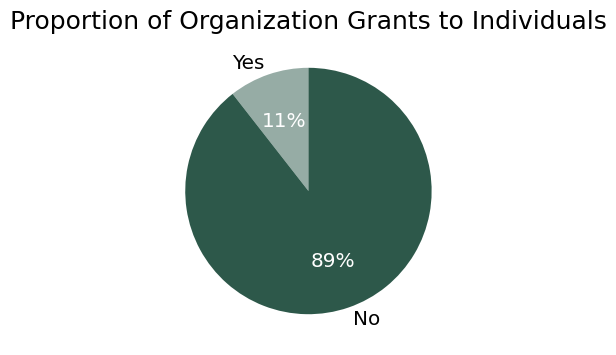

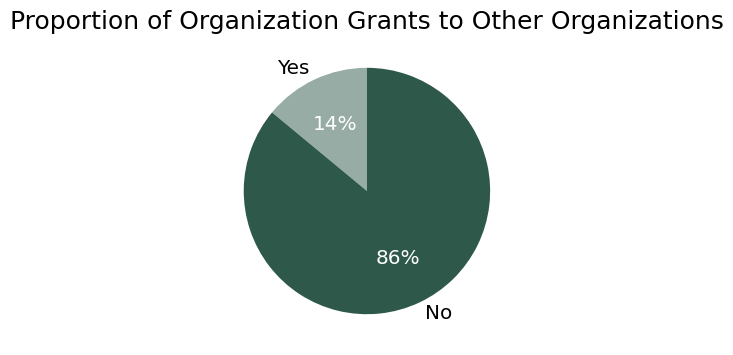

In [8]:
Individuals = df['rptgrntstoindvcd'].value_counts().loc[['Y', 'N']]
Organizations = df['rptgrntstogovtcd'].value_counts().loc[['Y', 'N']]

custom_labels = ['Yes', 'No']
labels_ordered = [custom_labels[i] for i in range(len(in_grants_ct))]

pichart_dfs = [Individuals, Organizations]
labels = ['Grants to Individuals', 'Grants to Other Organizations']

# Generate pie charts
for data, label in zip(pichart_dfs, labels):
    plt.figure(figsize=(6, 4))
    _, _, autotexts = plt.pie(data, labels=custom_labels, autopct='%1.0f%%', startangle=90, colors=['#96ACA5', '#2D584A'], textprops={'size': 'x-large'})
    for ins in autotexts:
        ins.set_color('white')
    plt.title(f'Proportion of Organization {label}', fontsize=18)
    plt.show()

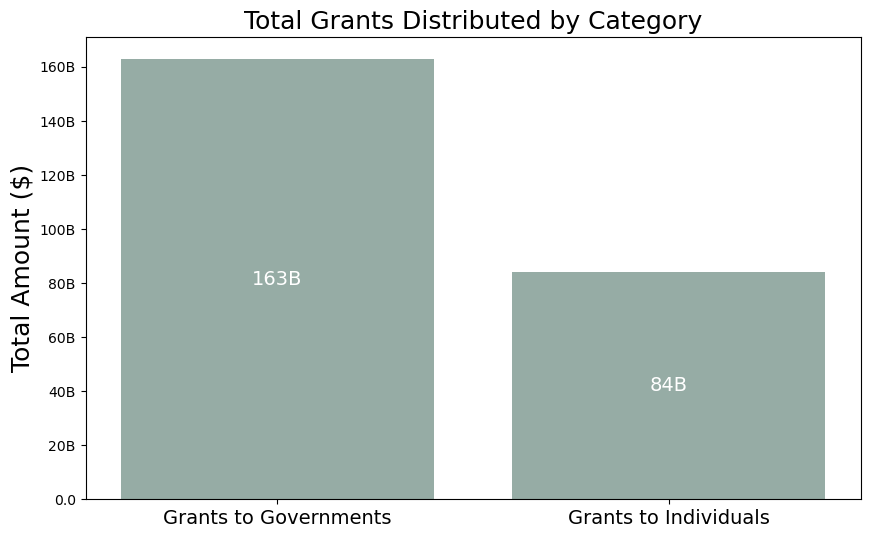

In [19]:
# Create function for abreviated value labels.
from matplotlib.ticker import FuncFormatter

def human_readable(x, pos):
    if x >= 1e12:  # Trillions
        s = f'{x / 1e12:.0f}T'
    elif x >= 1e9:  # Billions
        s = f'{x / 1e9:.0f}B'
    elif x >= 1e6:  # Millions
        s = f'{x / 1e6:.0f}M'
    elif x >= 1e3:  # Thousands
        s = f'{x / 1e3:.0f}K'
    else:
        s = str(x)
    return s
formatter = FuncFormatter(human_readable)

categories = ['Grants to Governments', 'Grants to Individuals']
values = [df['grntstogovt'].sum(), df['grnsttoindiv'].sum()]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color='#96ACA5')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{human_readable(yval, None)}',  # Use human_readable for label
             ha='center', va='center', color='white', fontsize=14)

plt.title('Total Grants Distributed by Category',fontsize=18)
plt.ylabel('Total Amount ($)',fontsize=18)
plt.xticks(fontsize=14)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()